In [88]:
# Make sure your sklearn package is up to date.
# pip install sklearn --upgrade


In [89]:
# load necessary python libraries

import pandas as pd

In [90]:
# read the cvs file into Pandas for the Kepler Object data

objects = pd.read_csv('kdata.csv')
objects.head()


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [91]:
# understand data
objects.shape

(9564, 50)

In [92]:
# understand data
objects.columns


Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [93]:
# a few columns seem to be empty looking at the CSV in excel - will delete those columns
#koi_teq_err1, koi_teq_err2
objects.drop("koi_teq_err1", inplace=True, axis=1)
objects.drop("koi_teq_err2", inplace=True, axis=1)

In [94]:
# validate empty columns are gone
objects.columns


Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [95]:
# count null values in each column
objects.isnull().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_err1        468
koi_steff_er

In [96]:
#cells that have actual data start with columns koi_period, everything before that seems to be a label or flag
#I am comfortable dropping rows of data with missing values starting after Kepler name 
# (not having a name seems really common)

#being told to drop all non-numeric columns
# rowid                  int64
# kepid                  int64
# kepoi_name            object
# koi_disposition       object
# koi_pdisposition      object
# koi_score            float64

objects.drop("kepler_name", inplace=True, axis=1)
objects.drop("kepid", inplace=True, axis=1)
objects.drop("kepoi_name", inplace=True, axis=1)
objects.drop("koi_pdisposition", inplace=True, axis=1)
objects.drop("koi_score", inplace=True, axis=1)
objects.drop("rowid", inplace=True, axis=1)

In [97]:
# also need to drop text column 
# koi_tce_delivname     object
objects.drop("koi_tce_delivname", inplace=True, axis=1)

In [98]:
# count null values in each column
objects.isnull().sum()

koi_disposition        0
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_period_err1      454
koi_period_err2      454
koi_time0bk            0
koi_time0bk_err1     454
koi_time0bk_err2     454
koi_impact           363
koi_impact_err1      454
koi_impact_err2      454
koi_duration           0
koi_duration_err1    454
koi_duration_err2    454
koi_depth            363
koi_depth_err1       454
koi_depth_err2       454
koi_prad             363
koi_prad_err1        363
koi_prad_err2        363
koi_teq              363
koi_insol            321
koi_insol_err1       321
koi_insol_err2       321
koi_model_snr        363
koi_tce_plnt_num     346
koi_steff            363
koi_steff_err1       468
koi_steff_err2       483
koi_slogg            363
koi_slogg_err1       468
koi_slogg_err2       468
koi_srad             363
koi_srad_err1        468
koi_srad_err2        468
ra                     0
dec                    0


In [99]:
# seems several columns are missing data rows - will need to remove null values
# drop duplicates in the data
# objects_df.drop_duplicates(inplace=True)

In [100]:
# check to see if there were any duplicates:
# objects_df.shape
# result is same number of rows, no duplicates

In [101]:
#drop rows with missing values
objects_col_df  = objects.dropna()
objects_col_df.shape

(8744, 41)

In [103]:
# data file is reduced to 8744 rows of data, 42 columns

In [105]:
# look at column data types 
objects.dtypes
# all except y value of koi is numeric

koi_disposition       object
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_num     float64
koi_steff            float64
koi_steff_err1       float64
koi_steff_err2       float64
koi_slogg            float64
koi_slogg_err1       float64
koi_slogg_err2

In [106]:
#koi_disposition is the y variable and string, need to convert category values to intervalues by Sklearn library
# from activity #7 20-1 reference

objects_encoded_df = pd.get_dummies(objects_col_df, columns=["koi_disposition"])
objects_encoded_df.head()

# data is encoded at final columns of dataframe into 3 values 
# koi_disposition_CANDIDATE	koi_disposition_CONFIRMED	koi_disposition_FALSE POSITIVE

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_CANDIDATE,koi_disposition_CONFIRMED,koi_disposition_FALSE POSITIVE
0,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,0
1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,0
2,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,...,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0,0,1
3,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0,1
4,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,...,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0,1,0


In [107]:
# identify unnecessary features with coefficient weights via linear regression
# import sklearn.linear_model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [108]:
objects_col_df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,FALSE POSITIVE,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [109]:
# set y values into new dataframe
y_values_df = objects_col_df["koi_disposition"]
y_encoded_df = pd.get_dummies(y_values_df, columns=["koi_disposition"])

y_encoded_df 

,CANDIDATE,CONFIRMED,FALSE POSITIVE
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
9559,0,0,1
9560,0,0,1
9561,1,0,0
9562,0,0,1


In [110]:
# set x values into a new dataframe (remove Y values from dataframe)
x_parms_df = objects_col_df.drop("koi_disposition", axis=1)
x_parms_df

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [116]:
# split the data in to training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_parms_df, y_encoded_df , random_state=2)

In [117]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)



In [118]:
# apply the trained scales (MinMax) to the training and testing data

X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [119]:
# Fit the model

In [120]:
# fit the model
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [121]:
model.coef_

array([[-0.47519313, -0.33221877, -0.25210583, -0.0811359 ,  0.39292929,
        -0.29554254,  0.29554254, -0.04510923,  0.38856199, -0.38856199,
         0.6477351 ,  0.12483421,  0.34006449, -0.3454824 ,  0.45955891,
        -0.45955891, -0.20517295, -0.03081955,  0.03081955, -2.51908253,
         0.38379949, -1.81884659,  0.05699263, -1.1260533 , -0.17724645,
        -1.25119528, -0.20459278, -0.17663982, -0.15257017,  0.67460306,
         0.18837898, -0.49563837, -0.09847411, -0.31025116, -0.15359675,
        -0.45364152,  0.02043102,  0.04760317, -0.07177155,  0.07525681],
       [-0.20749038, -0.26148152, -0.19254458, -0.08568404, -0.7225259 ,
         0.27267732, -0.27267732,  0.27319513, -0.44055434,  0.44055434,
        -1.22951253, -0.19530405, -0.47238935,  0.44399728, -0.53365852,
         0.53365852, -0.59107133,  0.35362363, -0.35362363,  1.25934817,
         0.19296107,  0.38837687, -0.65801384,  0.55868155,  1.04513871,
         0.83242592, -0.14477942,  0.34043228,  0.

In [123]:
# look at outputs - referencing 20.1 activity Stu_resp_disease
# predictions = model.predict(X_test_scaled)  # value of each
# print(f"First 10 Predictions:)   {predictions[:10]}")
# print(f"First 10 Actual Labels: {y_test_scaled[:10]}")

# predictions = model.predict_proba(X_test_scaled)  # probablity of each
# print(f"First 10 Predictions:)   {predictions[:10]}")
# print(f"First 10 Actual Labels: {y_test_scaled[:10]}")

First 10 Predictions:)   [[ 0.03064804 -0.04309771  1.01244967]
 [ 0.50613291  0.35885737  0.13500973]
 [ 0.4868009   0.40074028  0.11245882]
 [ 0.4314913   0.48085527  0.08765343]
 [-0.10215342  0.02374059  1.07841283]
 [ 0.36312401  0.57425274  0.06262325]
 [ 0.18752884  0.05897423  0.75349693]
 [-0.00267008  0.1209719   0.88169818]
 [ 0.08095424  0.16031874  0.75872701]
 [ 0.40294524  0.51833152  0.07872324]]
First 10 Actual Labels: [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

In [130]:
# Traing the model
print(f"Training Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test_scaled)}")

Training Data Score: 0.4917978111847349
Testing Data Score: 0.47904026262448157


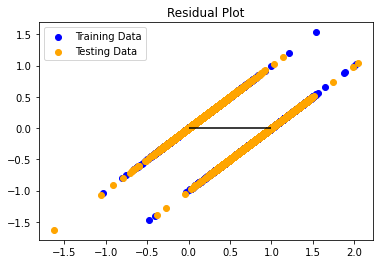

In [127]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

import matplotlib.pyplot as plt
import numpy as np

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [128]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.10214442791904939, R2: 0.47904026262448157


In [ ]:
# Hyperparameter Tuning
# Use GridSearchCV to tune the model's parameters
# reference Ins_GridSearch Activity#9 20.2 

In [131]:
# Create the SVC Model
from sklearn.svm import SVC 
model1 = SVC(kernel='linear')
model1

SVC(kernel='linear')

In [139]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10,50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model1, param_grid, verbose=3)


In [146]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ..................... C=1, gamma=0.0001, score=nan, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ..................... C=1, gamma=0.0001, score=nan, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ..................... C=1, gamma=0.0001, score=nan, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ..................... C=1, gamma=0.0001, score=nan, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ..................... C=1, gamma=0.0001, score=nan, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ..................... C=1, gamma=0.0005, score=nan, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\wavau\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\wavau\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\wavau\anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\_base.py", line 162, in fit
    accept_large_sparse=False)
  File "C:\Users\wavau\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\wavau\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\wavau\anaconda

[CV] ..................... C=50, gamma=0.005, score=nan, total=   0.0s
[CV] C=50, gamma=0.005 ...............................................
[CV] ..................... C=50, gamma=0.005, score=nan, total=   0.0s
[CV] C=50, gamma=0.005 ...............................................
[CV] ..................... C=50, gamma=0.005, score=nan, total=   0.0s


C:\Users\wavau\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\wavau\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\wavau\anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\_base.py", line 162, in fit
    accept_large_sparse=False)
  File "C:\Users\wavau\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\wavau\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\wavau\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py", line 808, in ch

ValueError: y should be a 1d array, got an array of shape (6558, 3) instead.

In [147]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


In [148]:
# List the best score
print(grid.best_score_)

nan


In [150]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [145]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [ ]:
# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'lowell.sav'
# joblib.dump(your_model, filename)